### Part 1: image classfier: SMILE Pose vs Neutral:
- upload the dataset
-  generate the pose
- Training the classfier
- do some example prediction

In [ ]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


File: /content/drive/MyDrive/mlTrainingSetImages/Smile/Photo on 15.03.24 at 15.06 #2.jpg


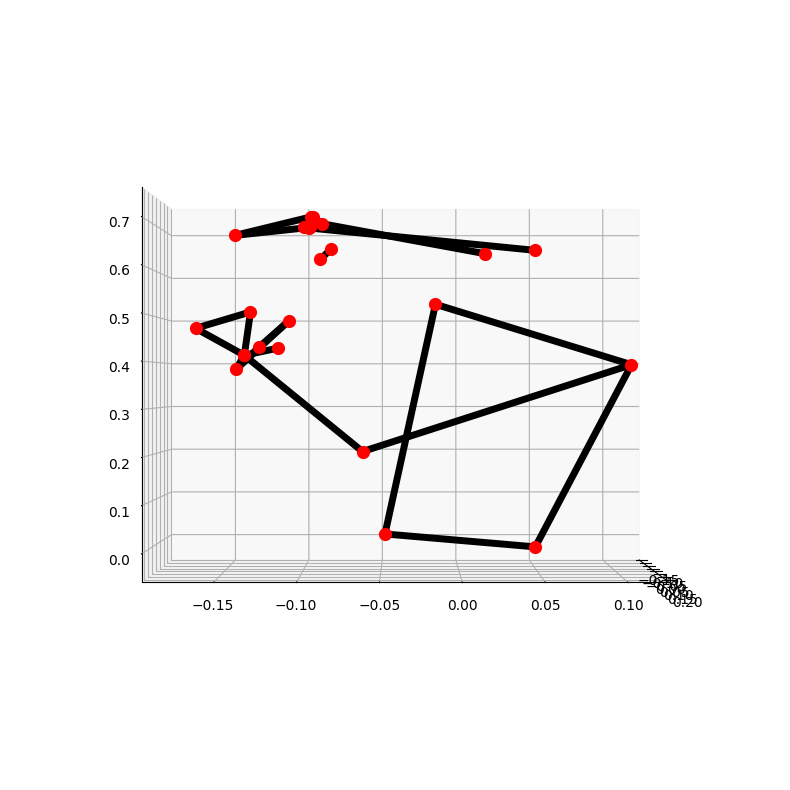

Human figure detected.


In [ ]:
 # Human figure detection

 import cv2

 import mediapipe as mp
 import numpy as np


 mp_drawing = mp.solutions.drawing_utils
 mp_drawing_styles = mp.solutions.drawing_styles
 mp_pose = mp.solutions.pose

 def pose():

  # For static images:
  IMAGE_FILES = [
    '/content/drive/MyDrive/mlTrainingSetImages/Smile/Photo on 15.03.24 at 15.06 #2.jpg',
  ]

  BG_COLOR = (192, 192, 192) # gray
  with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
      print(f'File: {file}')
      image = cv2.imread(file)
      image_height, image_width, _ = image.shape
      # Convert the BGR image to RGB before processing.
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      if not results.pose_landmarks:
          print('No results')
          continue
      landmarks=results.pose_world_landmarks.landmark
      noseIndex=mp_pose.PoseLandmark.NOSE



      annotated_image = image.copy()
      # Draw segmentation on the image.
      # bilateral filter to "results.segmentation_mask" with "image".
      condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
      bg_image = np.zeros(image.shape, dtype=np.uint8)
      bg_image[:] = BG_COLOR
      annotated_image = np.where(condition, annotated_image, bg_image)
      # Draw pose landmarks on image.
      mp_drawing.draw_landmarks(
          annotated_image,
          results.pose_landmarks,
          mp_pose.POSE_CONNECTIONS,
          landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
      cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
      # Plot pose world landmarks.
      mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)
    if not results.pose_landmarks:
      print('No human figure detected.')
    else:
      print('Human figure detected.')

 if __name__ == '__main__':
   pose()


In [ ]:
# Classifer trained and selected: is it a happy face or anything else
# Output:
# - Happy face
# - Other poses
# - No pose landmarks

In [ ]:
# Transform the images:

import cv2
import mediapipe as mp
import numpy as np
import os

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def process_images_from_folder(folder_path, label):
    features = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = pose.process(image_rgb)

            if results.pose_landmarks:
                landmark_list = results.pose_landmarks.landmark
                landmarks = np.array([(landmark.x, landmark.y, landmark.z) for landmark in landmark_list]).flatten()
                features.append(landmarks)
                labels.append(label)
    return features, labels

happy_face_folder = '/content/drive/MyDrive/mlTrainingSetImages/Smile'
# other_folder = '/content/drive/MyDrive/mlTrainingSetImages/Neutral'
other_folder = '/content/drive/MyDrive/mlTrainingSetImages/neurtral images'


features_y1, labels_y1 = process_images_from_folder(happy_face_folder, 1)
features_y0, labels_y0 = process_images_from_folder(other_folder, 0)

In [ ]:
# Trained out happy_face/ others classfier

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = np.array(features_y1 + features_y0)
y = np.array(labels_y1 + labels_y0)


# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
classifier = RandomForestClassifier()

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [ ]:
#Testing function:

def process_and_predict(image_path, classifier):
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process image to detect pose landmarks
    results = pose.process(image_rgb)

    # Check if landmarks were detected
    if results.pose_landmarks:
        # Extract and flatten landmarks
        landmark_list = results.pose_landmarks.landmark
        landmarks = np.array([(landmark.x, landmark.y, landmark.z) for landmark in landmark_list]).flatten()

        # Predict label for the new image
        prediction = classifier.predict([landmarks])
        return prediction[0]  # Return predicted label
    else:
        print("No pose landmarks detected in the image.")
        return None


In [ ]:
new_image_path = '/content/drive/MyDrive/mlTrainingSetImages/Smile/Photo on 15.03.24 at 15.06 #2.jpg' #update the path

# Assuming 'classifier' is trained model
predicted_label = process_and_predict(new_image_path, classifier)

if predicted_label is not None:
    print(f"Predicted label: {'Pose with an SMILE position' if predicted_label == 1 else 'Neutral poses'}")

Predicted label: Pose with an SMILE position


In [ ]:
new_image_path = '/content/drive/MyDrive/mlTrainingSetImages/neurtral images/-with-sad-eyes-hands-under-the-face-closeup-portrait-black-and-white-2A3J0KD.jpg'

# Assuming 'classifier' is trained model
predicted_label = process_and_predict(new_image_path, classifier)

if predicted_label is not None:
    print(f"Predicted label: {'Pose with an SMILE position' if predicted_label == 1 else 'Neutral poses'}")

Predicted label: Neutral poses


### Part 2:
- Capture live images and apply the claffier we training above to classify the pose

In [ ]:
import os

folder_path = "/content/screenshots_test"
os.makedirs(folder_path, exist_ok=True)
print(f"Folder created at: {folder_path}")


Folder created at: /content/screenshots_test


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
from time import sleep

# JavaScript to capture a single image
js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for the video to start playing
        await new Promise(resolve => setTimeout(resolve, 3000));

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        video.remove();

        return canvas.toDataURL('image/jpeg');
    }
''')

# Function to capture and save an image
def capture_and_save_image(image_index):
    display(js)  # Display the JavaScript interface for capturing an image
    image_data_url = eval_js('captureImage()')  # Capture the image
    image_data = base64.b64decode(image_data_url.split(',')[1])

    image_path = f"{folder_path}/image_{image_index}.jpg"
    with open(image_path, 'wb') as f:
        f.write(image_data)
    print(f"Image {image_index} saved at {image_path}")
    return image_path

# Capture and save 5 images at 4-second intervals
for i in range(5,6):
    new_image_path = capture_and_save_image(i+1)
    if i < 4:  # Wait for 4 seconds between captures, but not after the last one
        sleep(4)



<IPython.core.display.Javascript object>

Image 6 saved at /content/screenshots_test/image_6.jpg


In [ ]:

# Assuming 'classifier' is trained model
predicted_label = process_and_predict(new_image_path, classifier)

if predicted_label is not None:
    print(f"Predicted label: {'Pose with an SMILE pose' if predicted_label == 1 else 'Neutral poses'}")

Predicted label: Neutral poses


### Part 3:
Apply a spooky transformer on an image

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

def apply_godrays(image, light_pos, num_samples=200, decay=0.98, weight=0.01, density=0.8, exposure=1.0):
    height, width, _ = image.shape
    output = np.zeros_like(image, dtype=np.float32)

    # Ensure delta values are 2D arrays for proper broadcasting
    delta_x = ((light_pos[0] - np.arange(width)) / num_samples)[None, :]
    delta_y = ((light_pos[1] - np.arange(height)) / num_samples)[:, None]

    for i in range(num_samples):
        sample_positions_x = np.tile(np.arange(width), (height, 1)) - i * delta_x
        sample_positions_y = np.transpose(np.tile(np.arange(height), (width, 1))) - i * delta_y
        valid = (sample_positions_x >= 0) & (sample_positions_x < width) & \
                (sample_positions_y >= 0) & (sample_positions_y < height)
        sample_positions_x = np.clip(sample_positions_x, 0, width - 1).astype(int)
        sample_positions_y = np.clip(sample_positions_y, 0, height - 1).astype(int)
        sampled_image = image[sample_positions_y, sample_positions_x] * valid[..., None]
        output += (weight * decay**i) * sampled_image
    output = np.clip(output * density * exposure, 0, 255).astype(np.uint8)
    return output

# Load and apply the effect
image_path = '/content/screenshots/image_6.jpg'
image = cv2.imread(image_path)

if image is not None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB

    # Apply effect
    light_pos = (image.shape[1] // 2, image.shape[0] // 4) # Example light position
    godrays_image = apply_godrays(image, light_pos)

    # Convert back to BGR for OpenCV, if displaying or saving with OpenCV
    godrays_image = cv2.cvtColor(godrays_image, cv2.COLOR_RGB2BGR)

    # Display or save the result
    cv2.imwrite("/content/screenshots/filtered_image.jpg", godrays_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Image not found. Please check the path.")





Image not found. Please check the path.


In [ ]:
### Audio Recognition

### Part 4:
- Train an audio classfier model that detects "go" vs any other different word as "go" is going key word for transformation
- Upload the audio training data
- trained on this data
-  record it a live audio and use the trained model to predict if the word tht been said was "go"
- data source: https://www.kaggle.com/code/ajaybhatt/speech-classification/input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import librosa   #for audio processing/

import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install librosa

In [ ]:
train_audio_path = '/content/drive/MyDrive/speech-recognition/go/1002.wav'
samples, sample_rate = librosa.load(train_audio_path, sr = 16000)
print('samples:{}'.format(samples.shape))
print('sample_rate:{}'.format(sample_rate))
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/speech-recognition/go/1002.wav'

In [ ]:
#prepare the data
plt.rcParams['figure.figsize']=(15,7)
train_loc='/content/drive/MyDrive/speech-recognition'
labels=os.listdir(train_loc)
labels
count_lis=[len(os.listdir(train_loc+'/{}'.format(i))) for i in labels]
index=np.arange(0,len(count_lis))
plt.bar(index,count_lis)
plt.xticks(index,labels,rotation=60)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/speech-recognition'

In [ ]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_loc + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_loc + '/' + label + '/' + wav, sr = 8000)
        #samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) :
            all_wave.append(samples)
            all_label.append(label)

not_go
.ipynb_checkpoints
go


In [ ]:
#preapre the labels for training

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
labels_int = le.fit_transform(all_label)

# Now, convert integer labels to one-hot encoding
y1 = to_categorical(labels_int)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(np.array(all_wave).reshape(-1,8000,1),np.array(y1),test_size=0.2,shuffle=True)

In [ ]:
from tensorflow.keras.layers import Input,Dense,Flatten,Conv1D,MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
# model CNN classifier

inputs=Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)


outputs = Dense(2, activation='softmax')(conv)

model = Model(inputs, outputs)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model.fit(X_train, y_train ,epochs=50, callbacks=[es,mc], batch_size=32, validation_data=(X_test,y_test))


Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9651

22/22 [==============================] - 3s 133ms/step - loss: 0.0819 - accuracy: 0.9651 - val_loss: 0.0983 - val_accuracy: 0.9767
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 0.0837 - accuracy: 0.9680

22/22 [==============================] - 3s 132ms/step - loss: 0.0837 - accuracy: 0.9680 - val_loss: 0.0762 - val_accuracy: 0.9709
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9753

22/22 [==============================] - 3s 129ms/step - loss: 0.0694 - accuracy: 0.9753 - val_loss: 0.0986 - val_accuracy: 0.9767
Epoch 4/50
22/22 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9767

22/22 [==============================] - 4s 200ms/step - loss: 0.0674 - accuracy: 0.9767 - val_loss: 0.0830 - val_accuracy: 0.9709
Epoch 5/50
22/22 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9854

22/22 [==============================] - 3s 139ms/step - loss: 0.0451 - accuracy: 0.9854 - val_loss: 0.0706 - val_accuracy: 0.9767
Epoch 6/50
22/22 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9898

22/22 [==============================] - 4s 181ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0506 - val_accuracy: 0.9884
Epoch 7/50
22/22 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9884

22/22 [==============================] - 4s 192ms/step - loss: 0.0323 - accuracy: 0.9884 - val_loss: 0.0964 - val_accuracy: 0.9651
Epoch 8/50
22/22 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9738

22/22 [==============================] - 3s 130ms/step - loss: 0.0717 - accuracy: 0.9738 - val_loss: 0.0849 - val_accuracy: 0.9767
Epoch 9/50
22/22 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9767

22/22 [==============================] - 3s 131ms/step - loss: 0.0694 - accuracy: 0.9767 - val_loss: 0.0799 - val_accuracy: 0.9767
Epoch 10/50
22/22 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9796

22/22 [==============================] - 3s 137ms/step - loss: 0.0590 - accuracy: 0.9796 - val_loss: 0.0582 - val_accuracy: 0.9826
Epoch 11/50
22/22 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9869

22/22 [==============================] - 4s 164ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0589 - val_accuracy: 0.9826
Epoch 12/50
22/22 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9811

22/22 [==============================] - 3s 132ms/step - loss: 0.0577 - accuracy: 0.9811 - val_loss: 0.0798 - val_accuracy: 0.9767
Epoch 13/50
22/22 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9869

22/22 [==============================] - 3s 131ms/step - loss: 0.0360 - accuracy: 0.9869 - val_loss: 0.0640 - val_accuracy: 0.9767
Epoch 14/50
22/22 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9898

22/22 [==============================] - 3s 132ms/step - loss: 0.0225 - accuracy: 0.9898 - val_loss: 0.0929 - val_accuracy: 0.9826
Epoch 15/50
22/22 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9447

22/22 [==============================] - 4s 162ms/step - loss: 0.1582 - accuracy: 0.9447 - val_loss: 0.1380 - val_accuracy: 0.9535
Epoch 16/50
22/22 [==============================] - ETA: 0s - loss: 0.2151 - accuracy: 0.9141

22/22 [==============================] - 3s 136ms/step - loss: 0.2151 - accuracy: 0.9141 - val_loss: 0.1251 - val_accuracy: 0.9535
Epoch 16: early stopping


In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

# This function will be called later to save the audio file
def record_audio(filename):
  js = Javascript("""
    async function recordAudio() {
      // Prompt for permission, get the audio stream
      const stream = await navigator.mediaDevices.getUserMedia({audio: true});
      // Create a MediaRecorder instance
      const recorder = new MediaRecorder(stream);
      const data = [];

      // Push audio chunks into data array on dataavailable event
      recorder.ondataavailable = event => data.push(event.data);

      // Stop recording after 1 second and resolve the Promise
      recorder.start();
      await new Promise(resolve => setTimeout(resolve, 1000)); // Set duration here
      recorder.stop();

      // Wait for the stop event to ensure all the data
      return new Promise(resolve => recorder.onstop = resolve)
        .then(() => data);
    }

    async function saveAudio() {
      const data = await recordAudio();
      const audio = new Blob(data, { type: 'audio/webm' });
      const reader = new FileReader();
      reader.readAsDataURL(audio);
      reader.onloadend = () => {
        const base64AudioMessage = reader.result.split(',')[1];
        google.colab.kernel.invokeFunction('notebook.RecordAudio', [base64AudioMessage], {});
      };
    }
    saveAudio()
  """)
  display(js)

# This function will be invoked from JavaScript, receives the audio data as base64
def record_audio_base64(base64AudioMessage):
  audio_bytes = b64decode(base64AudioMessage)
  with open(filename, 'wb') as f:
    f.write(audio_bytes)

# Register the callback function that saves the audio
output.register_callback('notebook.RecordAudio', record_audio_base64)



In [ ]:
filename = '/content/test_audio/test_audio_no.wav'  # Make sure the path exists or adjust accordingly
record_audio(filename)

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import Audio
Audio(filename)

In [ ]:
## function to predict text


import numpy as np
import librosa

# Function to load and preprocess the audio
def preprocess_audio(filename):
    # Load the audio file
    audio, sr = librosa.load(filename, sr=8000)  # Ensure audio is loaded at 8 kHz
    # If the audio is too long, trim it to the first 8000 samples
    if len(audio) > 8000:
        audio = audio[:8000]
    # If the audio is too short, pad it with zeros to 8000 samples
    elif len(audio) < 8000:
        audio = np.pad(audio, (0, 8000 - len(audio)), 'constant')
    # Reshape audio for the model
    audio = audio.reshape(1, 8000, 1)
    return audio



def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
# Load and preprocess recorded audio
preprocessed_audio = preprocess_audio(filename)
prediction = predict(preprocessed_audio)
print("Predicted Text:", prediction)

1/1 [==============================] - 0s 17ms/step
Predicted Text: not_go


#### Final Part
- Combine all the models on a live recorded images and live recorded voice
- if it is the right pose and the right work "go", transform the image. if not don't do anything

In [ ]:
## Combining everyhting all togther

In [ ]:
# Step 1: the Pose detection

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
from time import sleep
import os

folder_path = "/content/screenshots_test"
os.makedirs(folder_path, exist_ok=True)
print(f"Folder created at: {folder_path}")



# JavaScript to capture a single image
js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for the video to start playing
        await new Promise(resolve => setTimeout(resolve, 3000));

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        video.remove();

        return canvas.toDataURL('image/jpeg');
    }
''')

# Function to capture and save an image
def capture_and_save_image(image_index):
    display(js)  # Display the JavaScript interface for capturing an image
    image_data_url = eval_js('captureImage()')  # Capture the image
    image_data = base64.b64decode(image_data_url.split(',')[1])

    image_path = f"{folder_path}/image_{image_index}.jpg"
    with open(image_path, 'wb') as f:
        f.write(image_data)
    print(f"Image {image_index} saved at {image_path}")
    return image_path
# Capture and save 5 images at 4-second intervals
for i in range(5,6):
    new_image_path = capture_and_save_image(i+1)
    if i < 4:  # Wait for 4 seconds between captures, but not after the last one
        sleep(4)




Folder created at: /content/screenshots_test


<IPython.core.display.Javascript object>

Image 6 saved at /content/screenshots_test/image_6.jpg


In [ ]:

# Assuming 'classifier' is your trained model
predicted_label = process_and_predict(new_image_path, classifier)

if predicted_label is not None:
    pose_flag  = predicted_label
    print(f"Predicted label: {'Pose with an SMILE pose' if predicted_label == 1 else 'Neutral poses'}")

Predicted label: Neutral poses


In [ ]:
# Step 2: the Audio detectiom

In [ ]:

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

# This function will be called later to save the audio file
def record_audio(filename):
  js = Javascript("""
    async function recordAudio() {
      // Prompt the user for permission, get the audio stream
      const stream = await navigator.mediaDevices.getUserMedia({audio: true});
      // Create a MediaRecorder instance
      const recorder = new MediaRecorder(stream);
      const data = [];

      // Push audio chunks into our data array on dataavailable event
      recorder.ondataavailable = event => data.push(event.data);

      // Stop recording after 1 second and resolve the Promise
      recorder.start();
      await new Promise(resolve => setTimeout(resolve, 1000)); // Set duration here
      recorder.stop();

      // Wait for the stop event to ensure we have all the data
      return new Promise(resolve => recorder.onstop = resolve)
        .then(() => data);
    }

    async function saveAudio() {
      const data = await recordAudio();
      const audio = new Blob(data, { type: 'audio/webm' });
      const reader = new FileReader();
      reader.readAsDataURL(audio);
      reader.onloadend = () => {
        const base64AudioMessage = reader.result.split(',')[1];
        google.colab.kernel.invokeFunction('notebook.RecordAudio', [base64AudioMessage], {});
      };
    }
    saveAudio()
  """)
  display(js)

# This function will be invoked from JavaScript, receives the audio data as base64
def record_audio_base64(base64AudioMessage):
  audio_bytes = b64decode(base64AudioMessage)
  with open(filename, 'wb') as f:
    f.write(audio_bytes)

# Register the callback function that saves the audio
output.register_callback('notebook.RecordAudio', record_audio_base64)






In [ ]:

folder_path = "/content/test_audio/"
os.makedirs(folder_path, exist_ok=True)
print(f"Folder created at: {folder_path}")



Folder created at: /content/test_audio/


In [ ]:

filename = '/content/test_audio/test_audio_main.wav'
record_audio(filename)


<IPython.core.display.Javascript object>

In [ ]:
## function to predict text


import numpy as np
import librosa

# Function to load and preprocess the audio
def preprocess_audio(filename):
    # Load the audio file
    audio, sr = librosa.load(filename, sr=8000)  # Ensure audio is loaded at 8 kHz
    # If the audio is too long, trim it to the first 8000 samples
    if len(audio) > 8000:
        audio = audio[:8000]
    # If the audio is too short, pad it with zeros to 8000 samples
    elif len(audio) < 8000:
        audio = np.pad(audio, (0, 8000 - len(audio)), 'constant')
    # Reshape audio for the model
    audio = audio.reshape(1, 8000, 1)
    return audio



def predict(audio):

    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
# Load and preprocess your recorded audio
preprocessed_audio = preprocess_audio(filename)
prediction = predict(preprocessed_audio)
print("Predicted Text:", prediction)
if prediction == "go":
  audio_flag = 1
else:
  audio_flag = 0
print(audio_flag)

NameError: name 'model' is not defined

In [ ]:
from IPython.display import Image, display


if audio_flag == 1 and pose_flag  == 1:

  print("Transform")


  # Load and apply the effect
  image = cv2.imread(new_image_path)

  if image is not None:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB

      # Apply effect
      light_pos = (image.shape[1] // 2, image.shape[0] // 4) # Example light position
      godrays_image = apply_godrays(image, light_pos)

      # Convert back to BGR for OpenCV, if displaying or saving with OpenCV
      godrays_image = cv2.cvtColor(godrays_image, cv2.COLOR_RGB2BGR)

      # Display or save the result
      cv2.imwrite("/content/screenshots/filtered_image.jpg", godrays_image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      display(Image(filename="/content/screenshots/filtered_image.jpg"))

  else:
      print("Image not found. Please check the path.")





else:
  print("Don't transform")

NameError: name 'audio_flag' is not defined